In [151]:
from sklearn.datasets import load_wine
wine = load_wine()

wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [152]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [153]:
import pandas as pd
import numpy as np


In [154]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [155]:
X = pd.DataFrame(wine.data, columns=wine.feature_names)

In [156]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [157]:
y = wine['target']
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)
model_0 = DecisionTreeClassifier()
model_0.fit(x_train, y_train)


DecisionTreeClassifier()

In [159]:
print(model_0.score(x_test, y_test))
print(model_0.score(x_train, y_train))


0.9555555555555556
1.0


In [160]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
optimal = 1
max_score = float('inf')
for k in range(1, 12):
    model_01 = KNeighborsClassifier(n_neighbors=k)
    model_01.fit(x_train, y_train)
    score = model_0.score(x_test, y_test)
    if score > max_score:
        max_score, optimal = score, k
model_01 = KNeighborsClassifier(n_neighbors=optimal)
model_01.fit(x_train, y_train)
print(model_01.score(x_test, y_test))
print(confusion_matrix(y_test, model_01.predict(x_test)))

0.7777777777777778
[[13  0  2]
 [ 3 13  2]
 [ 1  2  9]]


In [161]:
from sklearn.linear_model import LogisticRegression
model_02 = LogisticRegression()
model_02.fit(x_train, y_train)
print(model_02.score(x_test, y_test))


0.9777777777777777


c:\Users\amalb\OneDrive\Desktop\deep learning\python_book\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [162]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, model_02.predict(x_test)))

[[14  1  0]
 [ 0 18  0]
 [ 0  0 12]]


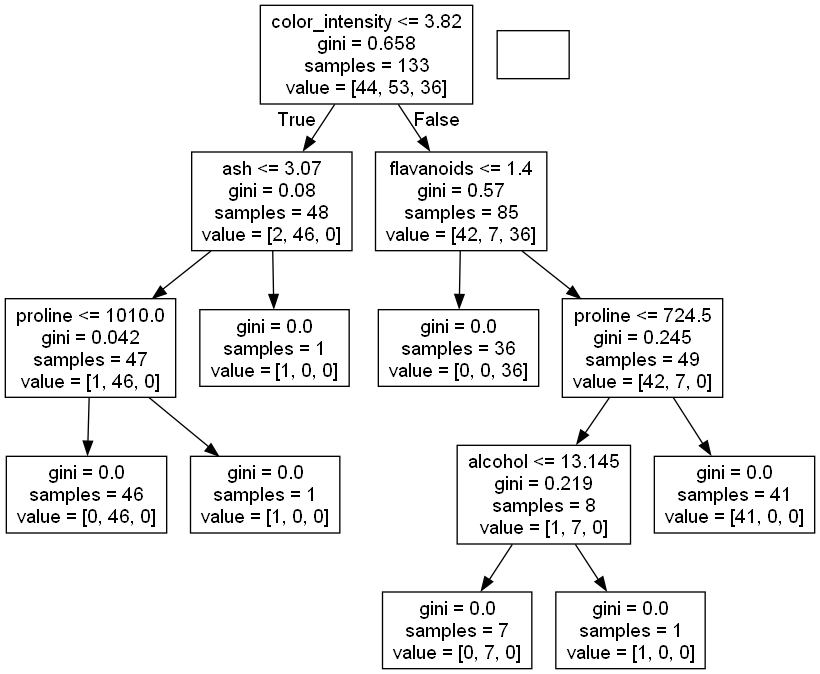

In [163]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(model_0,feature_names=x_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [164]:
model_12 = DecisionTreeClassifier(max_depth=3)
model_12.fit(x_train, y_train)
print(model_12.score(x_train, y_train))
print(model_12.score(x_test, y_test))

0.9924812030075187
0.9333333333333333


In [165]:
best_depth = 2
best_score = 0
for i in range(2, 10):
    model_temp = DecisionTreeClassifier(max_depth=i)
    model_temp.fit(x_train, y_train)
    score = model_temp.score(x_test, y_test)
    if score > best_score:
        best_score, best_depth = score, i
print(best_depth, best_score)
model_12 = DecisionTreeClassifier(max_depth=best_depth)
model_12.fit(x_train, y_train)
print(model_12.score(x_test, y_test))

3 0.9555555555555556
0.9555555555555556


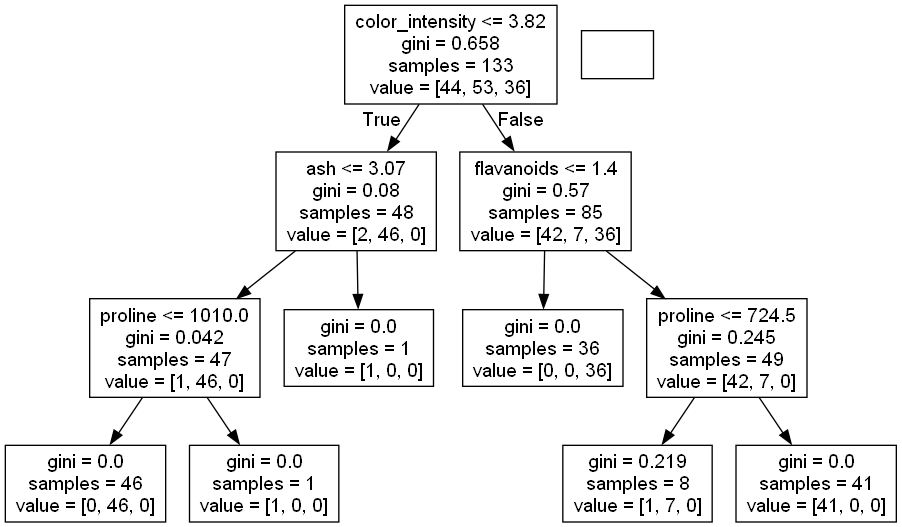

In [166]:
dot_data = export_graphviz(model_12,feature_names=x_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [180]:
best_ans = 2 
best_score = 0
for i in range(2, 10):
    model_temp = DecisionTreeClassifier(min_samples_leaf=i)
    model_temp.fit(x_train, y_train)
    score = model_temp.score(x_test, y_test)
    if score > best_score:
        best_score, best_ans = score, i
print(best_score, best_ans)
model_12 = DecisionTreeClassifier(min_samples_leaf=best_ans)
model_12.fit(x_train, y_train)
print(model_12.score(x_test, y_test))

0.9777777777777777 3
0.9555555555555556


In [168]:
best_samples_size = best_ans


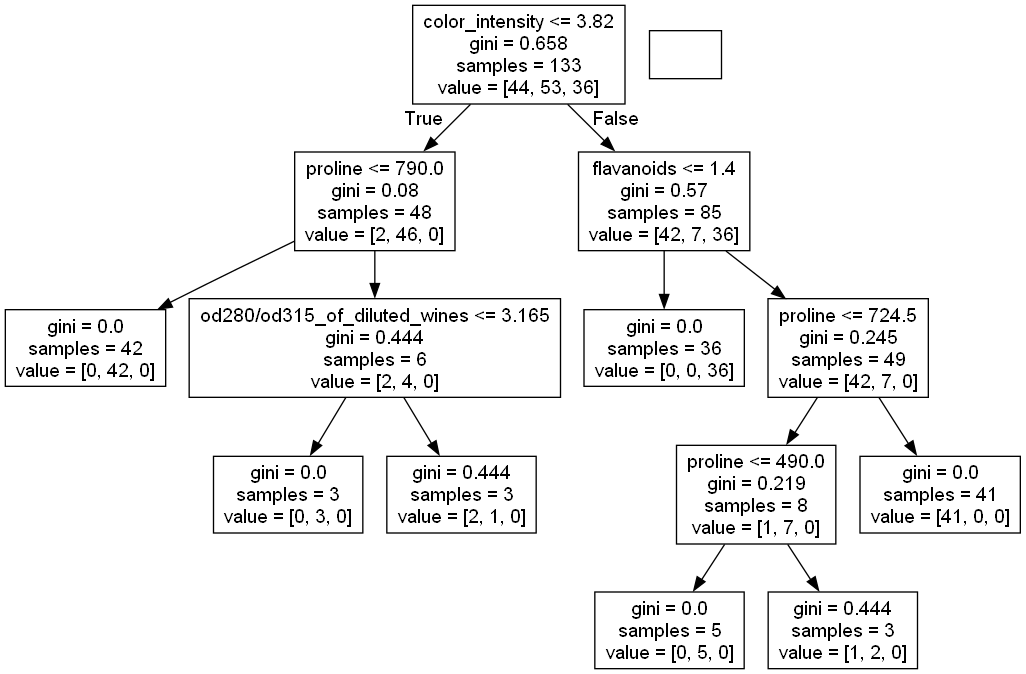

In [169]:
dot_data = export_graphviz(model_12,feature_names=x_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [177]:
model_14 = DecisionTreeClassifier(max_depth=best_depth,min_samples_leaf=best_samples_size)
model_14.fit(x_train, y_train)
print(model_14.score(x_test, y_test))
print(model_14.score(x_train, y_train))

0.9555555555555556
0.9849624060150376


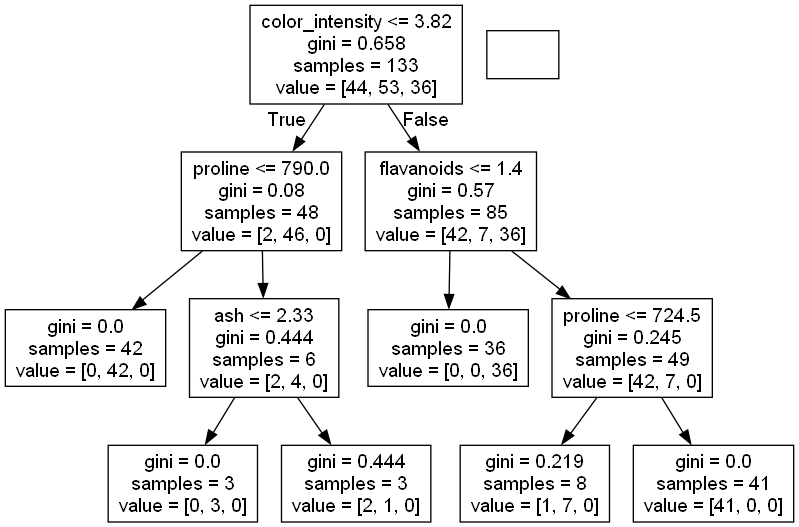

In [171]:
dot_data = export_graphviz(model_14,feature_names=x_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [174]:
from sklearn.model_selection import GridSearchCV
dt_classifier = DecisionTreeClassifier()
param_grid = {'min_impurity_decrease':np.linspace(0, 0.5, 11)}

grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)

grid_search.fit(x_train, y_train)

best_min_impurity_decrease = grid_search.best_params_['min_impurity_decrease']
best_score = grid_search.best_score_
print(best_min_impurity_decrease, best_score)



0.05 0.9472934472934472


In [181]:
model_15 = DecisionTreeClassifier(max_depth=best_depth, min_impurity_decrease=best_min_impurity_decrease, min_samples_leaf=best_samples_size)
model_15.fit(x_train, y_train)
print(model_15.score(x_test, y_test))
print(model_15.score(x_train, y_train))

0.9333333333333333
0.9774436090225563


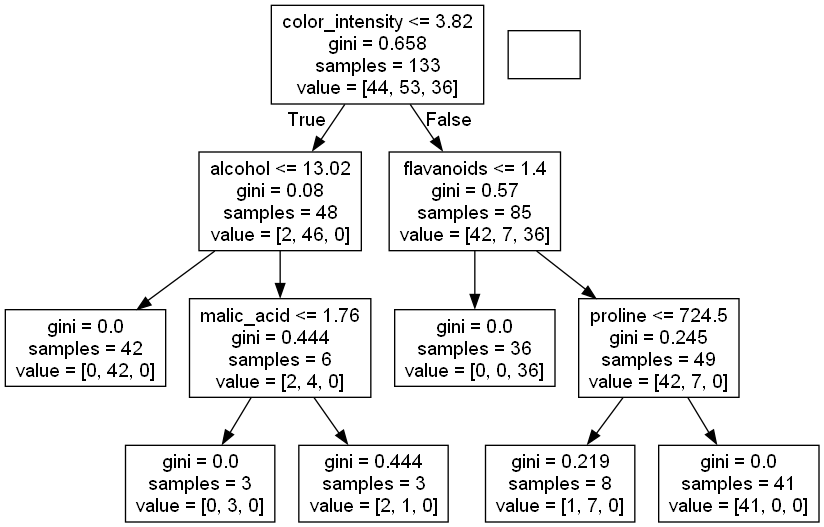

In [182]:
dot_data = export_graphviz(model_14,feature_names=x_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
